In [2]:
import cv2
import os

source_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\TUNA GRADE A\validation"

# Target directory for cropped zoom images
target_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Iterate over images in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        input_file_path = os.path.join(source_directory, filename)
        image = cv2.imread(input_file_path)
        
        # Construct the output file path with the correct extension
        output_file_path = os.path.join(target_directory, "grade_A_" + os.path.splitext(filename)[0] + ".jpg")
        
        # Save the image
        cv2.imwrite(output_file_path, image)

print("All images renamed and saved to:", target_directory)


All images renamed and saved to: C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats


In [3]:
#grade b
import cv2
import os

source_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\TUNA GRADE B\validation"

# Target directory for cropped zoom images
target_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Iterate over images in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        input_file_path = os.path.join(source_directory, filename)
        image = cv2.imread(input_file_path)
        
        # Construct the output file path with the correct extension
        output_file_path = os.path.join(target_directory, "grade_B_" + os.path.splitext(filename)[0] + ".jpg")
        
        # Save the image
        cv2.imwrite(output_file_path, image)

print("Grade B - All images renamed and saved to:", target_directory)


Grade B - All images renamed and saved to: C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats


In [4]:
#grade C
import cv2
import os

source_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\TUNA GRADE C\validation"

# Target directory for cropped zoom images
target_directory = r"C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Iterate over images in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        input_file_path = os.path.join(source_directory, filename)
        image = cv2.imread(input_file_path)
        
        # Construct the output file path with the correct extension
        output_file_path = os.path.join(target_directory, "grade_C_" + os.path.splitext(filename)[0] + ".jpg")
        
        # Save the image
        cv2.imwrite(output_file_path, image)

print("Grade C - All images renamed and saved to:", target_directory)


Grade C - All images renamed and saved to: C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats


In [6]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Confusion Matrix:
[[40  0  0]
 [ 5 35  0]
 [ 1  1 38]]
Accuracy: 0.9416666666666667

Classification Report:
              precision    recall  f1-score   support

           A       0.87      1.00      0.93        40
           B       0.97      0.88      0.92        40
           C       1.00      0.95      0.97        40

    accuracy                           0.94       120
   macro avg       0.95      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120



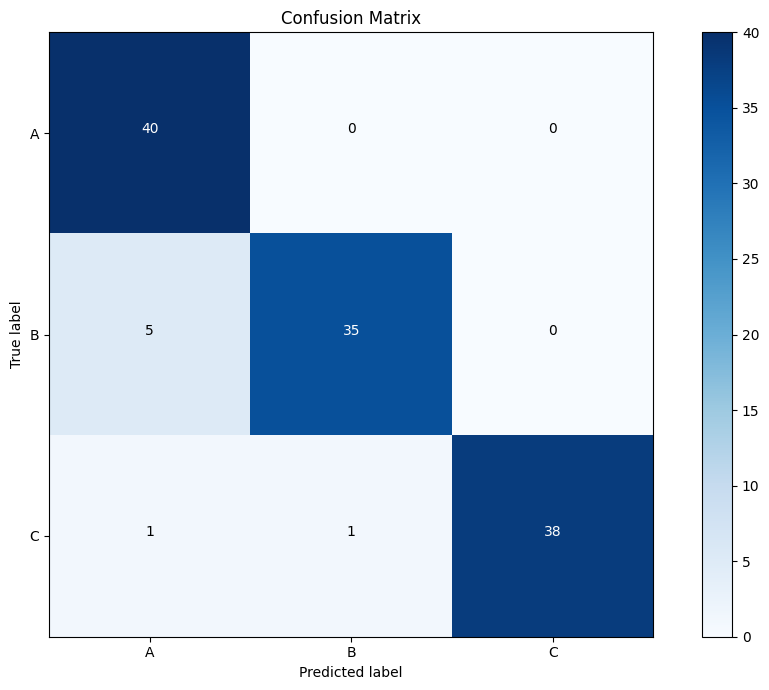

Confusion matrix and classification report saved to: C:\Users\Asus\OneDrive\Documents\School stuff\y 23-24\2nd sem\des2\Tuna_GRADES-20230522T082341Z-001\Tuna_GRADES\forstats


In [14]:
#val C
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import pandas as pd
import joblib
import tkinter as tk
from tkinter import filedialog
import math
import os
from sklearn.metrics import accuracy_score

def rgb_to_hsi(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue

        #Merge channels into picture and return image
        hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
        return hsi

def extract_features(image):
        #if zero dont input
        if np.any(image!=[0,0,0]):
            rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Normalize RGB values to [0, 1] for accurate HSV conversion
            rgb_normalized = rgb.astype(np.float32) / 255.0
    
            # Convert RGB to HSV
            hsv = cv2.cvtColor(rgb_normalized, cv2.COLOR_RGB2HSV)
    
            # Convert to grayscale for GLCM
            gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    
            # Convert RGB to HSI
            hsi = rgb_to_hsi(image)

            # RGB
            r, g, b = np.mean(rgb[:,:,0]), np.mean(rgb[:,:,1]), np.mean(rgb[:,:,2])
        
            # HSV
            h_hsv, s_hsv, v_hsv = np.mean(hsv[:,:,0]), np.mean(hsv[:,:,1]), np.mean(hsv[:,:,2])
        
            # HSI (HLS approximation)
            h_hsi, s_hsi, i_hsi = np.mean(hsi[:,:,0]), np.mean(hsi[:,:,1]), np.mean(hsi[:,:,2])
        
            # GLCM
            glcm = graycomatrix(gray, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                                 symmetric=True, normed=True)
            contrast = graycoprops(glcm, 'contrast')[0, 0]
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            energy = graycoprops(glcm, 'energy')[0, 0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        
            return r, g, b, h_hsv, s_hsv, v_hsv, h_hsi, s_hsi, i_hsi, contrast, correlation, energy, homogeneity
        else: 
            return None, None, None, None

# Load the trained K-NN model and scaler
knn_model = joblib.load('knn_model.pkl')
scaler = joblib.load('scaler.pkl')

# Create background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

# Function to classify an image and save the classified image
def classify_only(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Apply background subtraction
    fg_mask = bg_subtractor.apply(image)
    fg_mask = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (31, 31), 0)

    # Perform adaptive thresholding to separate foreground from background
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the thresholded image
    thresholded = cv2.bitwise_not(thresholded)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Find the contour with the largest area
        main_contour = max(contours, key=cv2.contourArea)

        # Draw bounding box around the main contour
        x, y, w, h = cv2.boundingRect(main_contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Zoom in to a specific area inside the bounding box
        zoom_factor = 3  # Adjust the zoom factor as needed
        center_x = x + w // 2
        center_y = y + h // 2
        zoom_size = min(w, h) // zoom_factor
        x_zoom = max(0, center_x - zoom_size // 2)
        y_zoom = max(0, center_y - zoom_size // 2)
        zoomed_image = image[y_zoom:y_zoom + zoom_size, x_zoom:x_zoom + zoom_size].copy()

        # Resize the zoomed image to 100x100 pixels
        zoomed_resized = cv2.resize(zoomed_image, (32, 32))

        # Extract features from the zoomed-in frame with foreground mask
        zoomed_fg_mask = fg_mask[y_zoom:y_zoom + zoom_size, x_zoom:x_zoom + zoom_size].copy()
        features = extract_features(cv2.bitwise_and(zoomed_image, zoomed_fg_mask))

    # Extract features
    features = extract_features(zoomed_resized)

    if features is not None:
        # Scale the features
        scaled_features = scaler.transform([features])

        # Predict the grade
        grade = knn_model.predict(scaled_features)

        image = cv2.resize(image, (800, 800))
        # Draw the predicted grade on the image
        cv2.putText(image, "Predicted Grade: {}".format(grade[0]), (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # Save the classified image to the output folder
        filename = os.path.basename(image_path)

        return grade[0]
    else:
        return "Error: Unable to extract features from the image."


# Function to classify images in a folder and save the classified images to another folder
def classify_images_in_folder(input_folder):
  # Iterate through each file in the input folder
    true_labels = []
    predicted_labels = []
    for filename in os.listdir(input_folder):

        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Construct the full path of the input image
            image_path = os.path.join(input_folder, filename)

            # Classify the image and save the classified image to the output folder
            predicted_grade = classify_only(image_path)
            
            # print("Image:", filename, "- Predicted Grade:", predicted_grade)
            
            if "grade_A" in filename:
                true_label = "A"
            elif "grade_B" in filename:
                true_label = "B"
            elif "grade_C" in filename:
                true_label = "C"
            else:
                continue
            if predicted_grade is not None:
                true_labels.append(true_label)
                predicted_labels.append(predicted_grade)
    return true_labels, predicted_labels

true_labels, predicted_labels = classify_images_in_folder(input_folder)

conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=["A", "B", "C"])
print("Confusion Matrix:")
print(conf_matrix)

# Model Evaluation
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

class_report = classification_report(true_labels, predicted_labels, labels=["A", "B", "C"])
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ["A", "B", "C"])
plt.yticks(tick_marks, ["A", "B", "C"])

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig(os.path.join(input_folder, "confusion_matrix.png"))
plt.show()

output_file = os.path.join(input_folder, "classification_report.txt")
with open(output_file, 'w') as f:
    f.write("Confusion Matrix:\n")
    f.write(str(conf_matrix))
    f.write("\n\nClassification Report:\n")
    f.write(class_report)

print("Confusion matrix and classification report saved to:", input_folder)


In [6]:
%%time
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler   
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib 

  
#importing datasets  
data_set= pd.read_csv('tuna_image_features.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values  
y= data_set.iloc[:, 0].values  
  
# Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=42)  
  
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

#Fitting K-NN classifier to the training set  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(x_test)

#Creating the Confusion matrix  
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional Model Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
scores = cross_val_score(classifier, x, y, cv=10)
print("Cross-validation scores:\n", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

# # Step 7: Save the trained model and the scaler
# joblib.dump(classifier, 'knn_model.pkl')
# joblib.dump(st_x, 'scaler.pkl')


Accuracy: 0.9315068493150684

Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.94      0.94        95
           B       0.93      0.88      0.90        91
           C       0.92      0.97      0.94       106

    accuracy                           0.93       292
   macro avg       0.93      0.93      0.93       292
weighted avg       0.93      0.93      0.93       292


Confusion Matrix:
[[ 89   3   3]
 [  5  80   6]
 [  0   3 103]]
Cross-validation scores:
 [0.87671233 0.93835616 0.84246575 0.80821918 0.82876712 0.75342466
 0.65753425 0.76712329 0.67586207 0.52413793]
Mean: 0.7672602739726028
Standard deviation: 0.11491888188739849
CPU times: total: 188 ms
Wall time: 181 ms
